In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import pandas
import pickle
import numpy
import datetime
import math
import os
import scipy
import warnings
warnings.simplefilter('ignore', numpy.RankWarning)
import battery_size_functions
import imp
imp.reload(battery_size_functions)

<module 'battery_size_functions' from '/home/ignavermeulen/modeling_charging_behavior/battery_size_functions.py'>

## Matrix transform

In [2]:
bin_size = 20
max_dc = int(40 * 60 * 24 / bin_size)
max_con = int(5 * 60 * 24 / bin_size)

In [3]:
file_detail = '_bin' + str(bin_size)
% time data_agents = battery_size_functions.load_dict_agents_data('data/agent_database/all_non_changing_agents' + file_detail + '/')

CPU times: user 42.7 s, sys: 900 ms, total: 43.6 s
Wall time: 43.8 s


In [27]:
for agent in data_agents:
    print(data_agents[agent]['centers_info'])
    print(data_agents[agent]['centers_css'])
    break

{(4.8848604000000009, 52.346265100000004): {'nr_of_sessions_in_center': 246, 'center_nr': 0}}
{(4.8848604000000009, 52.346265100000004): {'distance': {'3173': 0}, 'habit': ('3173',)}}


In [4]:
def get_mean_connection_distribution(battery_category, data_agents, bin_size):
    all_connection_distributions = [data_agents[agent]['overall_connection_distribution'][center] 
    for agent in data_agents for center in data_agents[agent]['overall_connection_distribution'] 
                                     if data_agents[agent]['battery_category'] == battery_category]
    mean_connection_dist = battery_size_functions.sum_distributions(all_connection_distributions)
    normed_mean_connection_dist = mean_connection_dist / numpy.sum(mean_connection_dist)
    fit_connection = battery_size_functions.get_high_range_fit_dist(0, len(normed_mean_connection_dist) - 1, 
            normed_mean_connection_dist, plot_residuals = False, plot_full_fit = False, plot_partial_fits = False,
            dist_name = '', first_chunk_days = 0.6, chunk_increase = 2.0, bin_size = bin_size)
    return battery_size_functions.no_negatives(fit_connection)
    

def get_mean_disconnection_distribution(battery_cagetory, data_agents, bin_size):
    all_disconnection_distributions = [data_agents[agent]['overall_disconnection_distribution'] 
    for agent in data_agents if data_agents[agent]['battery_category'] == battery_category]
    mean_disconnection_dist = battery_size_functions.sum_distributions(all_disconnection_distributions)
    normed_mean_disconnection_dist = mean_disconnection_dist / numpy.sum(mean_disconnection_dist)
    fit_disconnection = battery_size_functions.get_high_range_fit_dist(0, len(normed_mean_disconnection_dist) - 1, 
            normed_mean_disconnection_dist, plot_residuals = False, plot_full_fit = False, plot_partial_fits = False,
            dist_name = '', first_chunk_days = 0.6, chunk_increase = 2.0, bin_size = bin_size)
    return battery_size_functions.no_negatives(fit_connection)




In [8]:
for agent in data_agents:
    print(data_agents[agent].keys())
    print(type(data_agents[agent]['overall_connection_distribution']))
    print(data_agents[agent]['overall_connection_distribution'])
    break

dict_keys(['walking_preparedness', 'disconnection_duration_dists', 'battery_size', 'overall_activity_pattern', 'nr_centers', 'arrival_dists', 'maximum_distance', 'activity_patterns_training', 'centers_css', 'original_centers_css', 'connection_duration_dists', 'nr_sessions_per_week', 'centers_info', 'battery_category', 'user_type', 'car_type', 'nr_css_per_center', 'overall_disconnection_distribution', 'activity_patterns_centers', 'activity_patterns_test', 'overall_connection_distribution'])
<class 'dict'>
{(4.2404602999999996, 52.038623600000001): connection_duration
2000-01-01 00:00:00     1
2000-01-01 00:20:00     0
2000-01-01 00:40:00     0
2000-01-01 01:00:00     2
2000-01-01 01:20:00    13
2000-01-01 01:40:00    34
2000-01-01 02:00:00     5
2000-01-01 02:20:00     8
2000-01-01 02:40:00     0
2000-01-01 03:00:00     1
2000-01-01 03:20:00     0
2000-01-01 03:40:00     1
2000-01-01 04:00:00     1
2000-01-01 04:20:00     1
2000-01-01 04:40:00     1
Name: connection_duration, dtype: int

In [ ]:
# ''' get connection distirbutions per group '''
# all_connection_distributions_phev = [data_agents[agent]['overall_connection_distribution_per_center'][center] 
#     for agent in data_agents for center in data_agents[agent]['overall_connection_distribution_per_center'] 
#                                      if data_agents[agent]['battery_category'] == 'phev']
# all_connection_distributions_low_fev = [data_agents[agent]['overall_connection_distribution_per_center'][center] 
#     for agent in data_agents for center in data_agents[agent]['overall_connection_distribution_per_center']
#                                         if data_agents[agent]['battery_category'] == 'fev_low']
# all_connection_distributions_high_fev = [data_agents[agent]['overall_connection_distribution_per_center'][center] 
#     for agent in data_agents for center in data_agents[agent]['overall_connection_distribution_per_center'] 
#                                          if data_agents[agent]['battery_category'] == 'fev_high']

# phev_connection_dist = battery_size_functions.sum_distributions(all_connection_distributions_phev)
# low_fev_connection_dist = battery_size_functions.sum_distributions(all_connection_distributions_low_fev)
# high_fev_connection_dist = battery_size_functions.sum_distributions(all_connection_distributions_high_fev)

In [9]:
''' get connection distirbutions per group '''
all_connection_distributions_phev = [data_agents[agent]['overall_connection_distribution'][center] 
    for agent in data_agents for center in data_agents[agent]['overall_connection_distribution'] 
                                     if data_agents[agent]['battery_category'] == 'phev']
all_connection_distributions_low_fev = [data_agents[agent]['overall_connection_distribution'][center] 
    for agent in data_agents for center in data_agents[agent]['overall_connection_distribution']
                                        if data_agents[agent]['battery_category'] == 'fev_low']
all_connection_distributions_high_fev = [data_agents[agent]['overall_connection_distribution'][center] 
    for agent in data_agents for center in data_agents[agent]['overall_connection_distribution'] 
                                         if data_agents[agent]['battery_category'] == 'fev_high']

phev_connection_dist = battery_size_functions.sum_distributions(all_connection_distributions_phev)
low_fev_connection_dist = battery_size_functions.sum_distributions(all_connection_distributions_low_fev)
high_fev_connection_dist = battery_size_functions.sum_distributions(all_connection_distributions_high_fev)

In [10]:
''' get disconnection distributions per group '''
all_disconnection_distributions_phev = [data_agents[agent]['overall_disconnection_distribution'] 
    for agent in data_agents if data_agents[agent]['battery_category'] == 'phev']
all_disconnection_distributions_low_fev = [data_agents[agent]['overall_disconnection_distribution'] 
    for agent in data_agents if data_agents[agent]['battery_category'] == 'fev_low']
all_disconnection_distributions_high_fev = [data_agents[agent]['overall_disconnection_distribution'] 
    for agent in data_agents if data_agents[agent]['battery_category'] == 'fev_high']

phev_disconnection_dist = battery_size_functions.sum_distributions(all_disconnection_distributions_phev)
low_fev_disconnection_dist = battery_size_functions.sum_distributions(all_disconnection_distributions_low_fev)
high_fev_disconnection_dist = battery_size_functions.sum_distributions(all_disconnection_distributions_high_fev)

In [11]:
''' normalize them '''
normed_phev_disconnection_dist = phev_disconnection_dist / numpy.sum(phev_disconnection_dist)
normed_low_fev_disconnection_dist = low_fev_disconnection_dist / numpy.sum(low_fev_disconnection_dist)
normed_high_fev_disconnection_dist = high_fev_disconnection_dist / numpy.sum(high_fev_disconnection_dist)

normed_phev_connection_dist = phev_connection_dist / numpy.sum(phev_connection_dist)
normed_low_fev_connection_dist = low_fev_connection_dist / numpy.sum(low_fev_connection_dist)
normed_high_fev_connection_dist = high_fev_connection_dist / numpy.sum(high_fev_connection_dist)


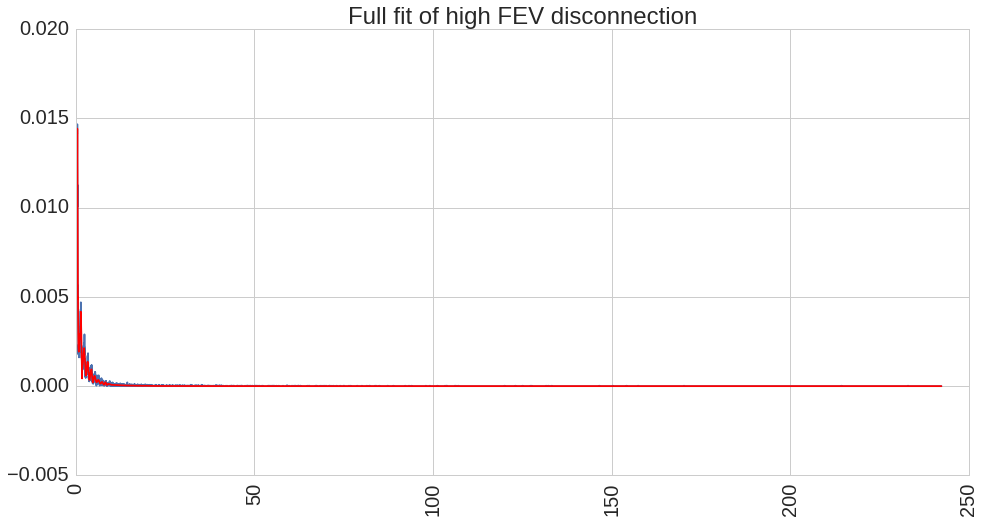

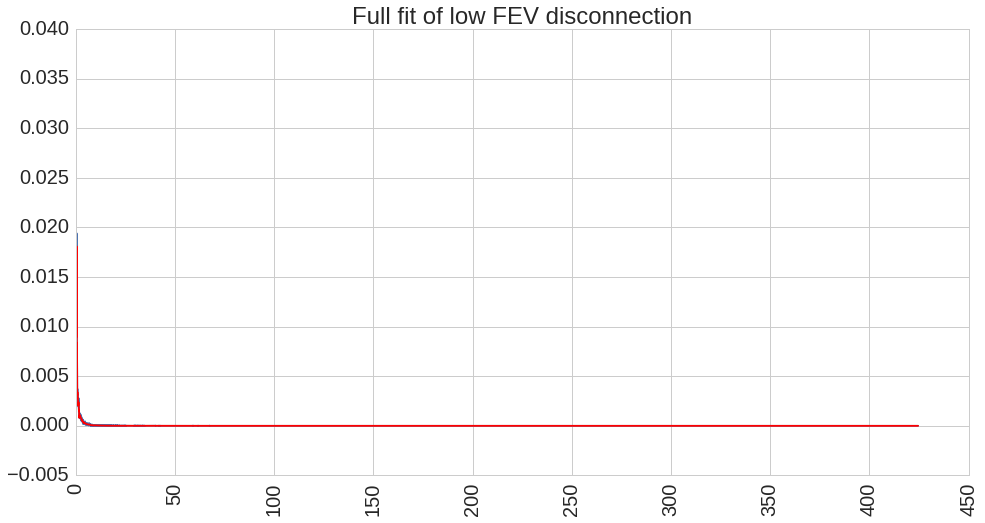

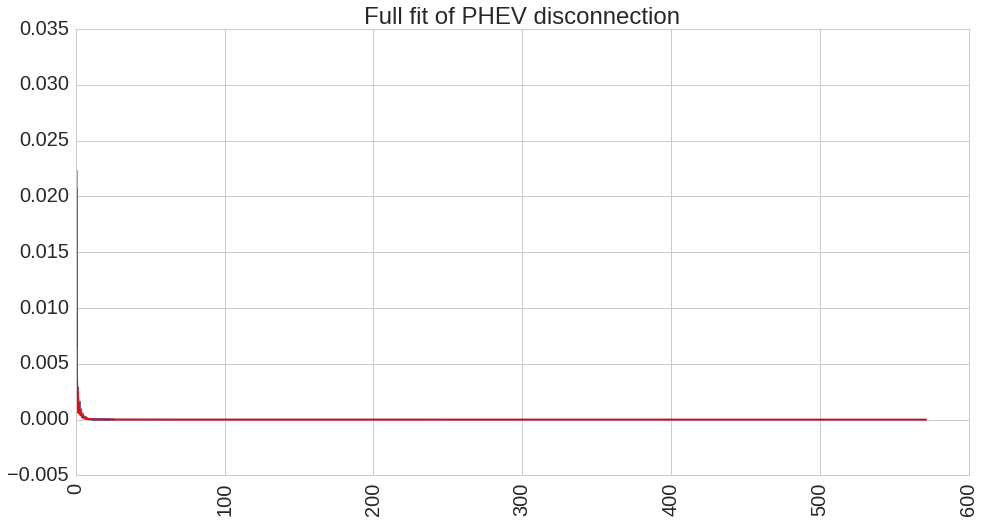

In [12]:
fit_high_fev_disconnection = battery_size_functions.get_high_range_fit_dist(0, len(normed_high_fev_disconnection_dist) - 1, 
    normed_high_fev_disconnection_dist, plot_residuals = False, plot_full_fit = False, plot_partial_fits = False, 
    dist_name = 'high FEV disconnection', first_chunk_days = 0.6, chunk_increase = 2.0, bin_size = bin_size)
fit_low_fev_disconnection = battery_size_functions.get_high_range_fit_dist(0, len(normed_low_fev_disconnection_dist) - 1, 
    normed_low_fev_disconnection_dist, plot_residuals = False, plot_full_fit = False, plot_partial_fits = False, 
    dist_name = 'low FEV disconnection', first_chunk_days = 0.6, chunk_increase = 2.0, bin_size = bin_size)
fit_phev_disconnection = battery_size_functions.get_high_range_fit_dist(0, len(normed_phev_disconnection_dist) - 1, 
    normed_phev_disconnection_dist, plot_residuals = False, plot_full_fit = False, plot_partial_fits = False, 
    dist_name = 'PHEV disconnection', first_chunk_days = 0.6, chunk_increase = 2.0, bin_size = bin_size)

In [13]:
fit_high_fev_disconnection = battery_size_functions.no_negatives(fit_high_fev_disconnection)
fit_low_fev_disconnection = battery_size_functions.no_negatives(fit_low_fev_disconnection)
fit_phev_disconnection = battery_size_functions.no_negatives(fit_phev_disconnection)

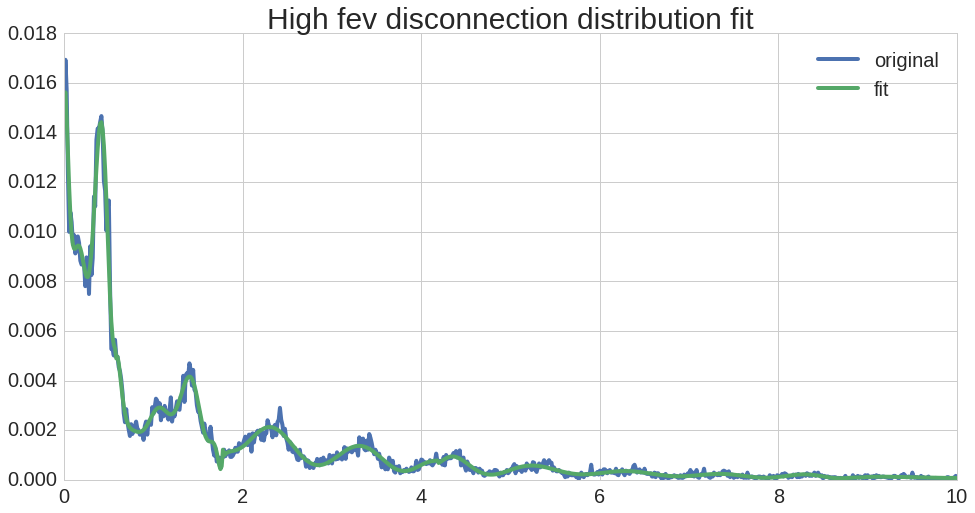

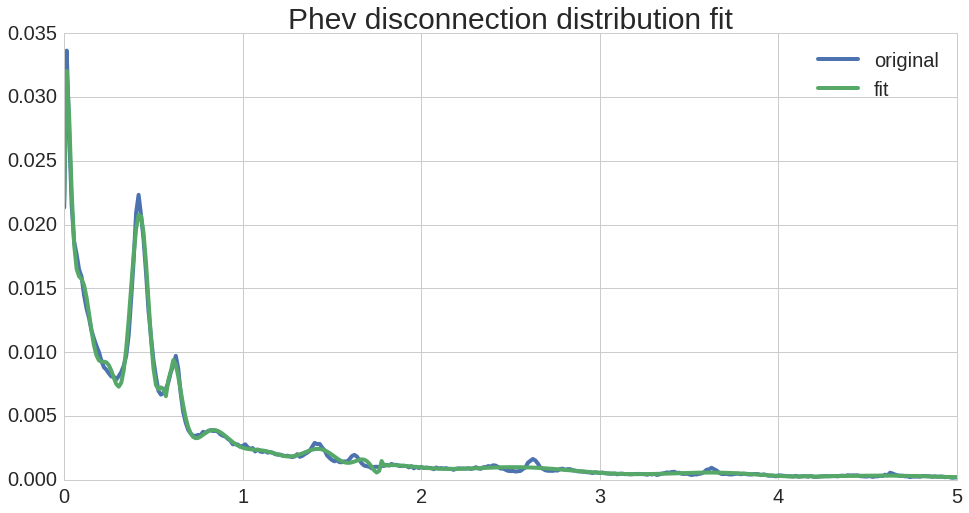

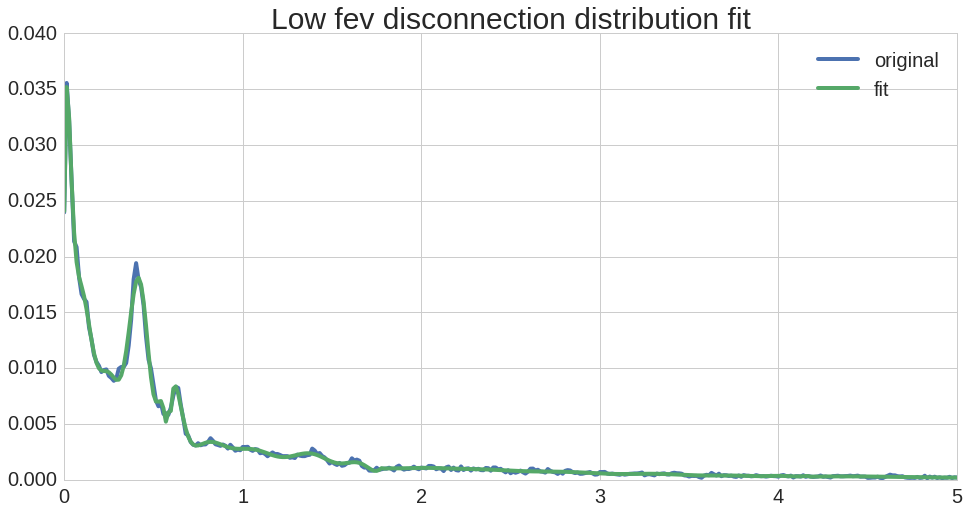

In [14]:
imp.reload(battery_size_functions)
battery_size_functions.plot_fit_and_original(normed_high_fev_disconnection_dist, fit_high_fev_disconnection, xmin = 0,
                                             xmax = 10, 
                      title = 'High fev disconnection distribution fit', bin_size = bin_size)
battery_size_functions.plot_fit_and_original(normed_phev_disconnection_dist, fit_phev_disconnection, xmax = 5, 
                      title = 'Phev disconnection distribution fit', bin_size = bin_size)
battery_size_functions.plot_fit_and_original(normed_low_fev_disconnection_dist, fit_low_fev_disconnection, xmax = 5, 
                      title = 'Low fev disconnection distribution fit', bin_size = bin_size)

In [18]:
fit_high_fev_connection = battery_size_functions.get_high_range_fit_dist(0, len(normed_high_fev_connection_dist) - 1, 
    normed_high_fev_connection_dist, plot_residuals = False, plot_full_fit = False, plot_partial_fits = False, 
    dist_name = 'high FEV connection', first_chunk_days = 0.6, chunk_increase = 2.0, bin_size = bin_size)
fit_low_fev_connection = battery_size_functions.get_high_range_fit_dist(0, len(normed_low_fev_connection_dist) - 1, 
    normed_low_fev_connection_dist, plot_residuals = False, plot_full_fit = False, plot_partial_fits = False, 
    dist_name = 'low FEV connection', first_chunk_days = 0.6, chunk_increase = 2.0, bin_size = bin_size)
fit_phev_connection = battery_size_functions.get_high_range_fit_dist(0, len(normed_phev_connection_dist) - 1, 
    normed_phev_connection_dist, plot_residuals = False, plot_full_fit = False, plot_partial_fits = False, 
    dist_name = 'PHEV connection', first_chunk_days = 0.6, chunk_increase = 2.0, bin_size = bin_size)

In [19]:
fit_high_fev_connection = battery_size_functions.no_negatives(fit_high_fev_connection)
fit_low_fev_connection = battery_size_functions.no_negatives(fit_low_fev_connection)
fit_phev_connection = battery_size_functions.no_negatives(fit_phev_connection)

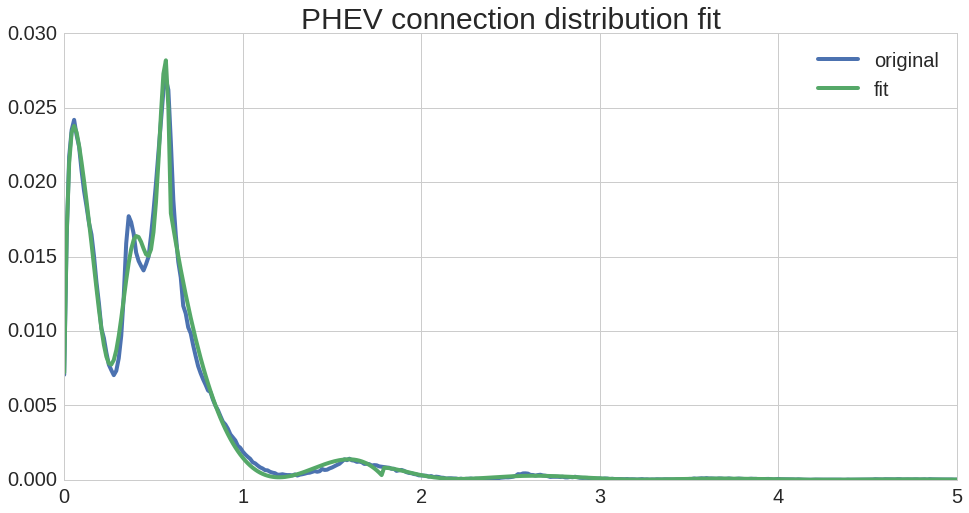

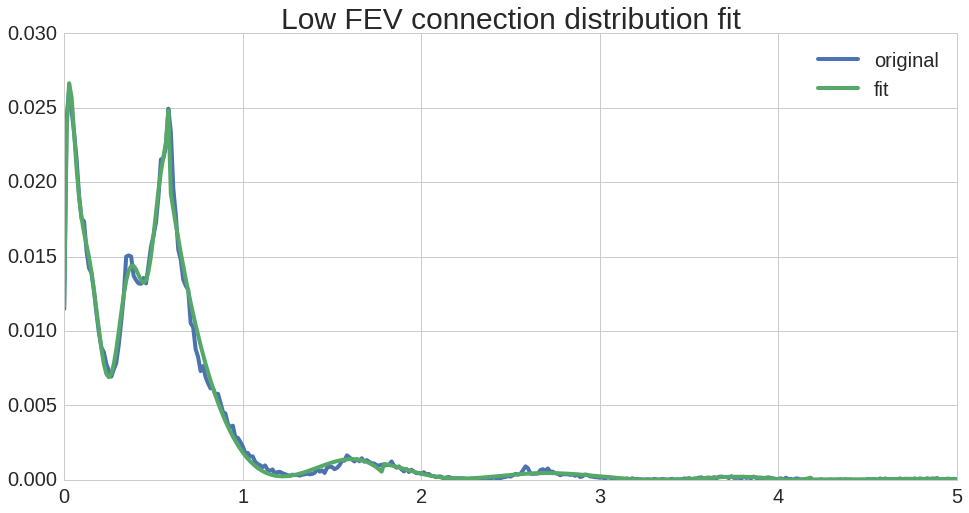

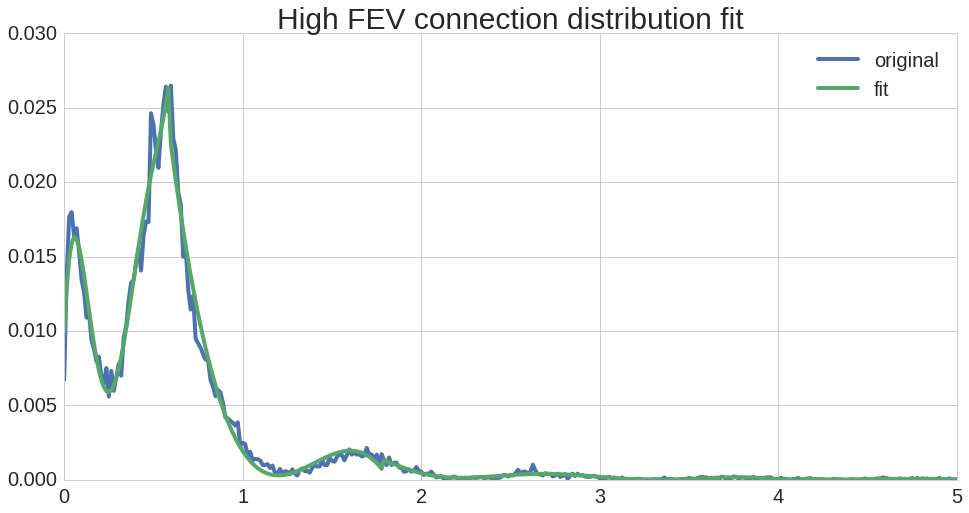

In [20]:
battery_size_functions.plot_fit_and_original(normed_phev_connection_dist, fit_phev_connection, xmax = 5, 
                      title = 'PHEV connection distribution fit', bin_size = bin_size)
battery_size_functions.plot_fit_and_original(normed_low_fev_connection_dist, fit_low_fev_connection, xmax = 5, 
                      title = 'Low FEV connection distribution fit', bin_size = bin_size)
battery_size_functions.plot_fit_and_original(normed_high_fev_connection_dist, fit_high_fev_connection, xmax = 5, 
                      title = 'High FEV connection distribution fit', bin_size = bin_size)

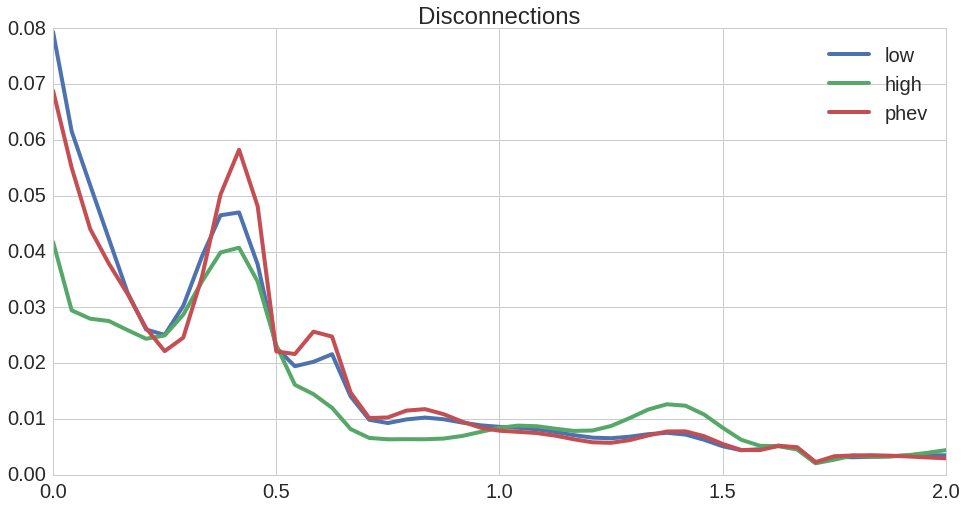

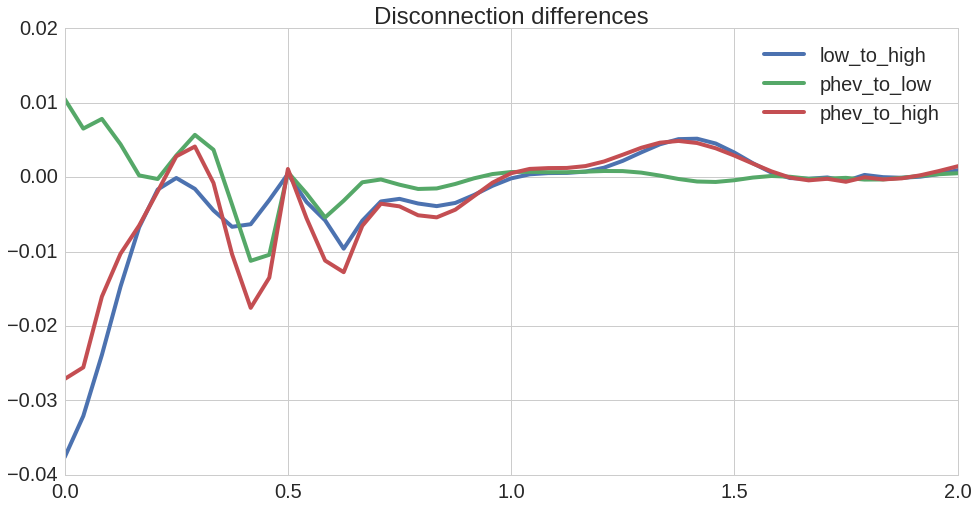

In [20]:
max_length = min(len(fit_high_fev_disconnection), len(fit_phev_disconnection))
diff_dc_phev_to_high = [fit_high_fev_disconnection[i] - fit_phev_disconnection[i] for i in range(max_length)]

max_length = min(len(fit_low_fev_disconnection), len(fit_phev_disconnection))
diff_dc_phev_to_low = [fit_low_fev_disconnection[i] - fit_phev_disconnection[i] for i in range(max_length)]

max_length = min(len(fit_high_fev_disconnection), len(fit_low_fev_disconnection))
diff_dc_low_to_high = [fit_high_fev_disconnection[i] - fit_low_fev_disconnection[i] for i in range(max_length)]

max_length = min(len(fit_low_fev_disconnection), min(len(fit_high_fev_disconnection), len(fit_phev_disconnection)))
xvals = [i * bin_size / 60 / 24 for i in range(max_length)]
battery_size_functions.simple_plot_mult_dist(xvals, [fit_low_fev_disconnection[:max_length], fit_high_fev_disconnection[:max_length], 
    fit_phev_disconnection[:max_length]], yvals_labels = ['low', 'high', 'phev'], 
    title = 'Disconnections', xmax = 2, ymin = 0)


max_length = min(len(diff_dc_low_to_high), min(len(diff_dc_phev_to_high), len(diff_dc_phev_to_low)))
xvals = [i * bin_size / 60 / 24 for i in range(max_length)]


battery_size_functions.simple_plot_mult_dist(xvals, [diff_dc_low_to_high[:max_length], diff_dc_phev_to_low[:max_length], 
    diff_dc_phev_to_high[:max_length]], yvals_labels = ['low_to_high', 'phev_to_low', 'phev_to_high'], 
    title = 'Disconnection differences', xmin = 0, xmax = 2)

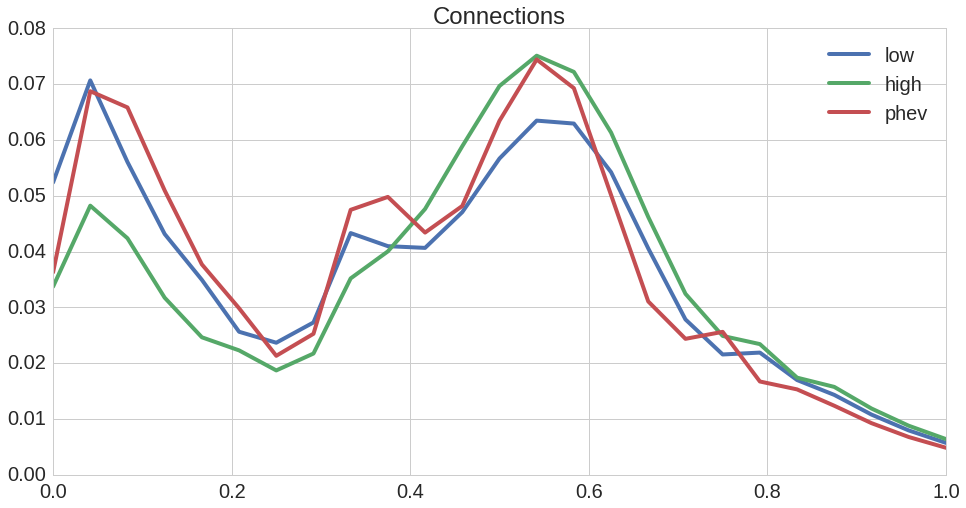

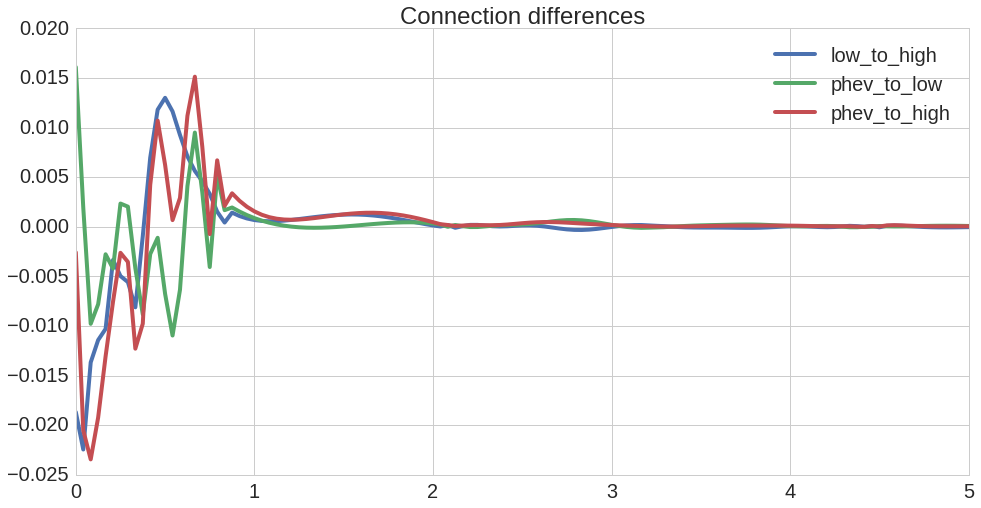

In [21]:
max_length = min(len(fit_high_fev_connection), len(fit_phev_connection))
diff_con_phev_to_high = [fit_high_fev_connection[i] - fit_phev_connection[i] for i in range(max_length)]

max_length = min(len(fit_low_fev_connection), len(fit_phev_connection))
diff_con_phev_to_low = [fit_low_fev_connection[i] - fit_phev_connection[i] for i in range(max_length)]

max_length = min(len(fit_high_fev_connection), len(fit_low_fev_connection))
diff_con_low_to_high = [fit_high_fev_connection[i] - fit_low_fev_connection[i] for i in range(max_length)]



max_length = min(len(fit_low_fev_connection), min(len(fit_high_fev_connection), len(fit_phev_connection)))
xvals = [i * bin_size / 60 / 24 for i in range(max_length)]
battery_size_functions.simple_plot_mult_dist(xvals, [fit_low_fev_connection[:max_length], fit_high_fev_connection[:max_length], 
    fit_phev_connection[:max_length]], yvals_labels = ['low', 'high', 'phev'], 
    title = 'Connections', xmax = 1, ymin = 0)

max_length = min(len(diff_con_low_to_high), min(len(diff_con_phev_to_high), len(diff_con_phev_to_low)))
xvals = [i * bin_size / 60 / 24 for i in range(max_length)]
battery_size_functions.simple_plot_mult_dist(xvals, [diff_con_low_to_high[:max_length], diff_con_phev_to_low[:max_length], 
    diff_con_phev_to_high[:max_length]], yvals_labels = ['low_to_high', 'phev_to_low', 'phev_to_high'], 
    title = 'Connection differences', xmax = 5)

In [22]:
phev_to_high_dc_transform = battery_size_functions.get_transform_factors(fit_phev_disconnection[:max_dc], 
                                                                         fit_high_fev_disconnection[:max_dc])
phev_to_low_dc_transform = battery_size_functions.get_transform_factors(fit_phev_disconnection[:max_dc], 
                                                                         fit_low_fev_disconnection[:max_dc])
phev_to_high_con_transform = battery_size_functions.get_transform_factors(fit_phev_connection[:max_con], 
                                                                         fit_high_fev_connection[:max_con])
phev_to_low_con_transform = battery_size_functions.get_transform_factors(fit_phev_connection[:max_con], 
                                                                         fit_low_fev_connection[:max_con])

In [23]:
dists = [phev_to_high_dc_transform, phev_to_low_dc_transform, phev_to_high_con_transform, phev_to_low_con_transform]

correct = True
for dist in dists:
    for val in dist:
        if math.isnan(val):
            print('nan detected')
            correct = False
        if math.isinf(val):
            print('inf detected')
            correct = False
if not correct:
    print('No good, check what went wrong!')
else:
    print('Valid distributions')

Valid distributions


In [21]:
bin_size

20

In [22]:
file_detail = '_bin' + str(bin_size)
directory = 'data/simulation_pkls/'
# with open(directory + 'transformation_disconnection_phev_to_high' + file_detail + '.pkl', 'wb') as f:
#         pickle.dump(phev_to_high_dc_transform, f)
# with open(directory + 'transformation_disconnection_phev_to_low' + file_detail + '.pkl', 'wb') as f:
#         pickle.dump(phev_to_low_dc_transform, f)
# with open(directory + 'transformation_disconnection_low_to_high' + file_detail + '.pkl', 'wb') as f:
#         pickle.dump(phev_to_high_con_transform, f)
# with open(directory + 'transformation_connection_phev_to_high' + file_detail + '.pkl', 'wb') as f:
#         pickle.dump(phev_to_high_con_transform, f)
# with open(directory + 'transformation_connection_phev_to_low' + file_detail + '.pkl', 'wb') as f:
#         pickle.dump(phev_to_low_con_transform, f)
# with open(directory + 'transformation_connection_low_to_high' + file_detail + '.pkl', 'wb') as f:
#         pickle.dump(phev_to_low_con_transform, f)
# with open(directory + 'disconnection_distribution_high_fev' + file_detail + '.pkl', 'wb') as f:
#         pickle.dump(fit_high_fev_disconnection, f)
# with open(directory + 'disconnection_distribution_low_fev' + file_detail + '.pkl', 'wb') as f:
#         pickle.dump(fit_low_fev_disconnection, f)
with open(directory + 'connection_distribution_high_fev' + file_detail + '.pkl', 'wb') as f:
        pickle.dump(fit_high_fev_connection, f)
with open(directory + 'connection_distribution_low_fev' + file_detail + '.pkl', 'wb') as f:
        pickle.dump(fit_low_fev_connection, f)
# with open(directory + 'disconnection_distribution_phev' + file_detail + '.pkl', 'wb') as f:
#         pickle.dump(fit_phev_disconnection, f)
with open(directory + 'connection_distribution_phev' + file_detail + '.pkl', 'wb') as f:
        pickle.dump(fit_phev_connection, f)
    
        

## Shifting transform

In [25]:
bin_size = 20
max_dc = int(40 * 60 * 24 / bin_size)
max_con = int(5 * 60 * 24 / bin_size)

In [26]:
file_detail = '_bin' + str(bin_size)
directory = 'data/simulation_pkls/'
with open(directory + 'disconnection_distribution_high_fev' + file_detail + '.pkl', 'rb') as f:
        disconnection_distribution_high_fev = pickle.load(f)
with open(directory + 'disconnection_distribution_low_fev' + file_detail + '.pkl', 'rb') as f:
        disconnection_distribution_low_fev = pickle.load(f)
with open(directory + 'connection_distribution_high_fev' + file_detail + '.pkl', 'rb') as f:
        connection_distribution_high_fev = pickle.load(f)
with open(directory + 'connection_distribution_low_fev' + file_detail + '.pkl', 'rb') as f:
        connection_distribution_low_fev = pickle.load(f)
with open(directory + 'disconnection_distribution_phev' + file_detail + '.pkl', 'rb') as f:
        disconnection_distribution_phev = pickle.load(f)
with open(directory + 'connection_distribution_phev' + file_detail + '.pkl', 'rb') as f:
        connection_distribution_phev = pickle.load(f)

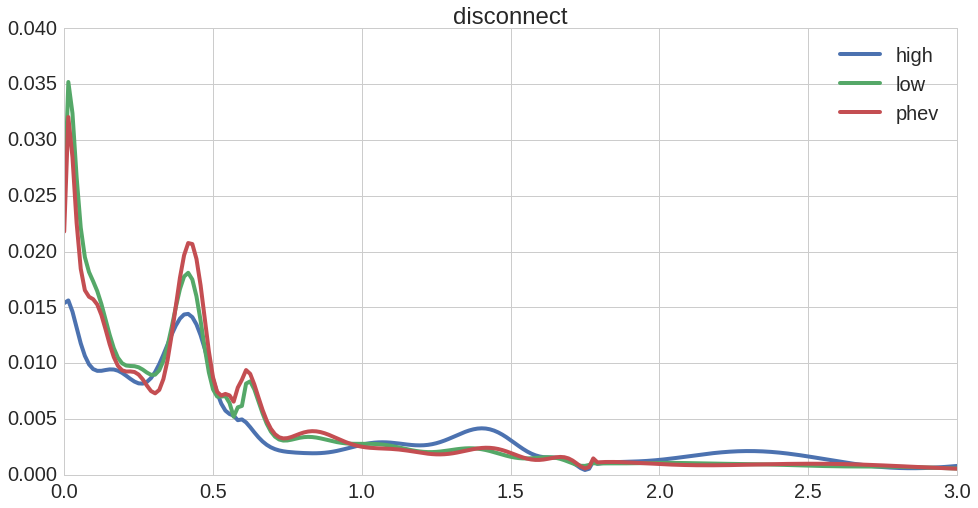

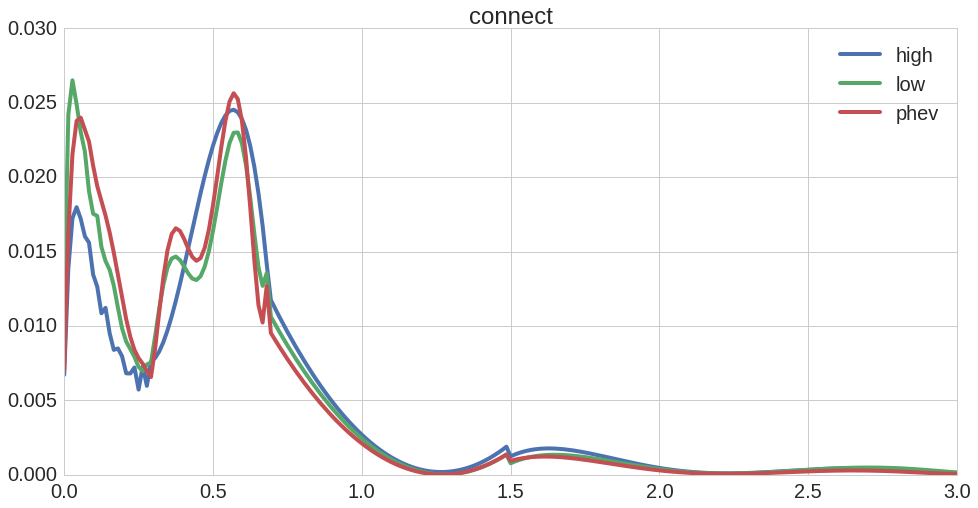

In [33]:
x_dc_vals = [i / 60 / 24 * bin_size for i in range(max_dc)]
dc_yvals = [disconnection_distribution_high_fev[:max_dc], disconnection_distribution_low_fev[:max_dc], disconnection_distribution_phev[:max_dc]]
x_con_vals = [i / 60 / 24 * bin_size for i in range(max_con)]
con_yvals = [connection_distribution_high_fev[:max_con], connection_distribution_low_fev[:max_con], connection_distribution_phev[:max_con]]
battery_size_functions.simple_plot_mult_dist(x_dc_vals, dc_yvals, ['high', 'low', 'phev'], title = 'disconnect',
                                            xmax = 3)
battery_size_functions.simple_plot_mult_dist(x_con_vals, con_yvals, ['high', 'low', 'phev'], title = 'connect',
                                            xmax = 3)

** Probabilities to skip 24 hours **

In [142]:
def get_dist_skipping_probs(target_dist, origin_dist, bin_size, printing = False):
    if len(target_dist) != len(origin_dist):
        print('Target and origin distribution in get_dist_skipping_probs should be of same length, not %d and %d' %
             (len(target_dist), len(origin_dist)))
    nr_bins_per_day = int(60 * 24 / bin_size)
    nr_of_days = len(target_dist) / nr_bins_per_day
    if abs(nr_of_days % 1) > 0:
        nr_of_days = int(nr_of_days + 1)
    else:
        nr_of_days = int(nr_of_days)
    dist_probs = []
    for day in range(nr_of_days):
        if day == 0:
            disregard_part = 0.25
            day_target = sum(target_dist[int(disregard_part*nr_bins_per_day):int((day+1)*nr_bins_per_day)])
            day_origin = sum(origin_dist[int(disregard_part*nr_bins_per_day):int((day+1)*nr_bins_per_day)])
            skip_prob_day = skip_prob(day_target, day_origin)
#             bins_to_disregard = int(nr_bins_per_day*disregard_part)
#             probs = [0.0]*bins_to_disregard + [skip_prob_day]*int(nr_bins_per_day - bins_to_disregard)
#             dist_probs += probs
            dist_probs += [skip_prob_day] * nr_bins_per_day
        else:
            day_target = sum(target_dist[int(day*nr_bins_per_day):int((day+1)*nr_bins_per_day)])
            day_origin = sum(origin_dist[int(day*nr_bins_per_day):int((day+1)*nr_bins_per_day)])
            skip_prob_day = skip_prob(day_target, day_origin)            
            dist_probs += [skip_prob_day] * nr_bins_per_day
        if printing:
            print('Evaluating bins %d to %d' %(int(day*nr_bins_per_day), int((day+1)*nr_bins_per_day)))
            print('Value of target is %.3f and value of origin is %.3f. This yields:' %(day_target, day_origin))
            print('Skipping prob for day %d: %.4f' %(day, skip_prob_day))
            if skip_prob_day == 0:
                print('Probability of zero')
    dist_probs = dist_probs[:len(target_dist)]
    return dist_probs

def skip_prob(val_target, val_origin):
    return (val_origin - val_target) / val_origin
 

def skipping_transform(dist_origin, dist_skipping_probs, bin_size):
    if len(dist_origin) != len(dist_skipping_probs):
        print('Length of origin distribution (%d) and skipping distribution (%d) in skipping_transform should be same.' %
             (len(dist_origin), len(dist_skipping_probs)))
    nr_bins_per_day = int(60 * 24 / bin_size)
    nr_of_days = len(dist_origin) / nr_bins_per_day
    if abs(nr_of_days % 1) > 0:
        nr_of_days = int(nr_of_days + 1)
    else:
        nr_of_days = int(nr_of_days)
#     print('%d bins per day, %d days' %(nr_bins_per_day, nr_of_days))
    carry = [0.0]*nr_bins_per_day
    result = []
    for day in range(nr_of_days):
        day_result = []
        for j in range(nr_bins_per_day):
            current_bin = int((day*nr_bins_per_day) + j)
            if current_bin >= len(dist_origin):
                break
            p_skip = dist_skipping_probs[current_bin]
            if p_skip >= 0: # pass carrying value on to next day (skip more)
                day_result.append(dist_origin[current_bin] * (1 - p_skip))
                if day == 0 and j < 0.25 * nr_bins_per_day:
                    continue
                carry[j] = carry[j] + dist_origin[current_bin] * p_skip
            else: # absorb (part of) the carrying mass
                day_result.append(dist_origin[current_bin] - carry[j] * p_skip)
                if day == 0 and j < 0.25 * nr_bins_per_day:
                    continue
                carry[j] = carry[j] * (1 + p_skip)
#             carrying_value = carry[j] * (1 - dist_skipping_probs[current_bin])
#             day_result.append(dist_origin[current_bin] * (1 - dist_skipping_probs[current_bin]) + carry[j] * (1 - dist_skipping_probs[current_bin]))
#             carry[j] = dist_origin[current_bin] * dist_skipping_probs[current_bin] + carry[j] * dist_skipping_probs[current_bin]
        result += day_result

    return result
    

t = [0.01, 0.02, 0.08, 0.1, 0.05, 0.05, 0.5, 0.1, 0.1]
o = [0.25, 0.2, 0.05, 0.1, 0.1, 0.2, 0.0, 0.01, 0.09]
# p = []
# for i in range(len(t)):
#     p.append(skip_prob(t[i], o[i]))
p = get_dist_skipping_probs(t, o, int(60 * 24 / 3))

print('probilities:\n\t' + str(p))
print('original:\n\t' + str(o))
print('target:\n\t' + str(t))
print('prediction:\n\t' + str(['%.2f' % val for val in skipping_transform(o, p,  int(60 * 24 / 3))]))

        

probilities:
	[0.78, 0.78, 0.78, 0.5, 0.5, 0.5, -6.0, -6.0, -6.0]
original:
	[0.25, 0.2, 0.05, 0.1, 0.1, 0.2, 0.0, 0.01, 0.09]
target:
	[0.01, 0.02, 0.08, 0.1, 0.05, 0.05, 0.5, 0.1, 0.1]
prediction:
	['0.05', '0.04', '0.01', '0.05', '0.05', '0.10', '0.30', '1.25', '0.92']


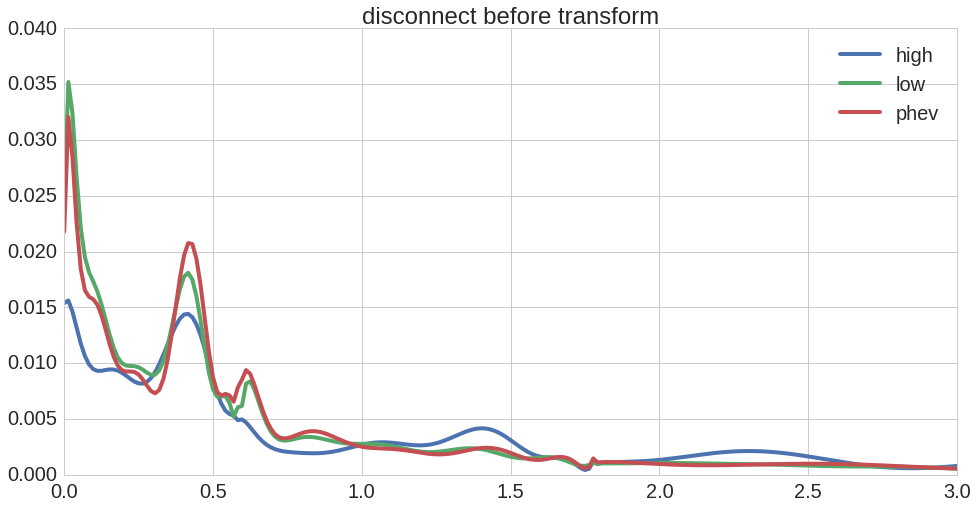

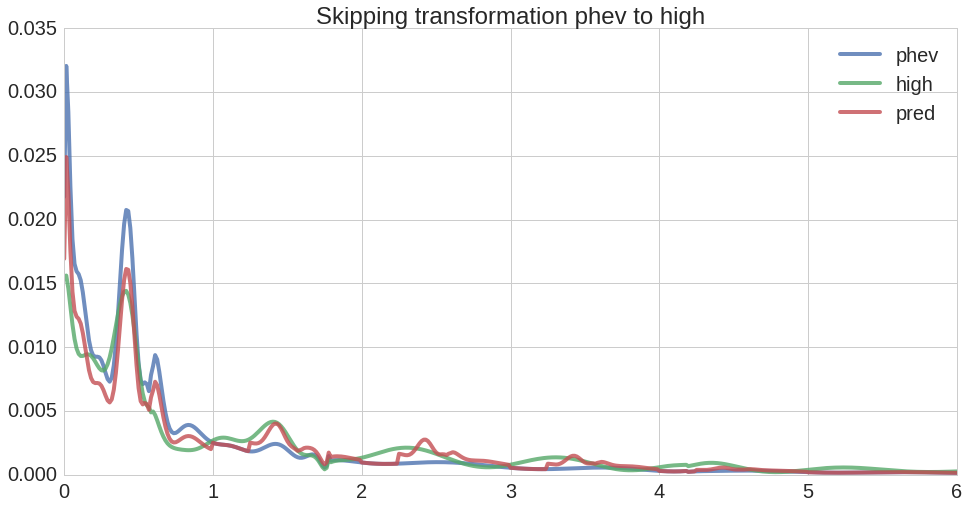

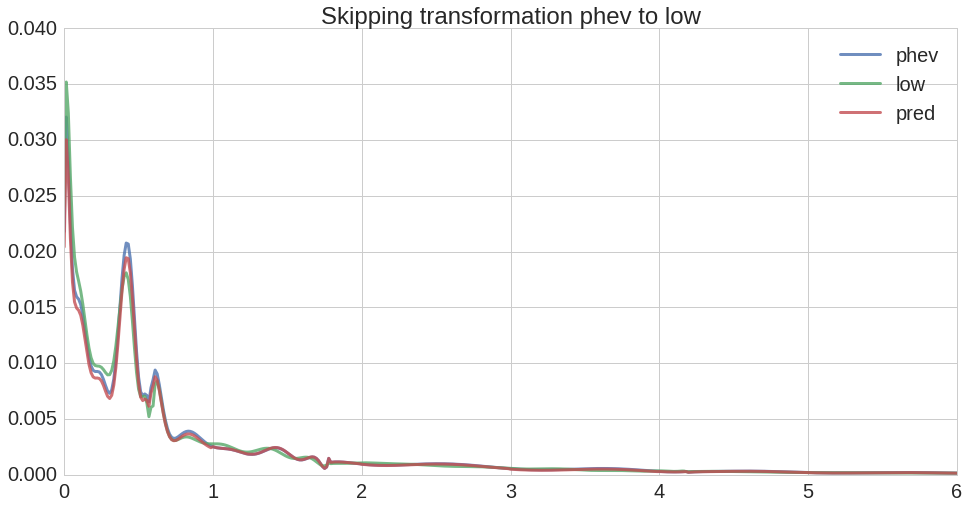

In [148]:
imp.reload(battery_size_functions)
x_dc_vals = [i / 60 / 24 * bin_size for i in range(max_dc)]
dc_yvals = [disconnection_distribution_high_fev[:max_dc], 
            disconnection_distribution_low_fev[:max_dc], 
            disconnection_distribution_phev[:max_dc]]
battery_size_functions.simple_plot_mult_dist(x_dc_vals, dc_yvals, ['high', 'low', 'phev'], title = 'disconnect before transform',
                                            xmax = 3)

phev_to_high_probs = get_dist_skipping_probs(disconnection_distribution_high_fev[:max_dc], 
                                            disconnection_distribution_phev[:max_dc], 20,
                                            printing = False)
phev_to_low_probs = get_dist_skipping_probs(disconnection_distribution_low_fev[:max_dc],
                                           disconnection_distribution_phev[:max_dc], 20,
                                           printing = False)
phev_to_high_trans = skipping_transform(disconnection_distribution_phev[:max_dc], phev_to_high_probs, 20)
phev_to_low_trans = skipping_transform(disconnection_distribution_phev[:max_dc], phev_to_low_probs, 20)

battery_size_functions.simple_plot_mult_dist(x_dc_vals, [disconnection_distribution_phev[:max_dc], 
                                                        disconnection_distribution_high_fev[:max_dc],
                                                        phev_to_high_trans],
                                            ['phev', 'high', 'pred'], xmax = 6,
                                            title = 'Skipping transformation phev to high', linewidth = 4,
                                            alpha = 0.8)
battery_size_functions.simple_plot_mult_dist(x_dc_vals, [disconnection_distribution_phev[:max_dc], 
                                                        disconnection_distribution_low_fev[:max_dc],
                                                        phev_to_low_trans],
                                            ['phev', 'low', 'pred'], xmax = 6,
                                            title = 'Skipping transformation phev to low', linewidth = 3,
                                            alpha = 0.8)




In [157]:
data_dir = 'data/battery_size/'
with open(data_dir + 'transformed_skipping_phev_to_high_bin20.pkl', 'rb') as f:
    transformed_skipping_phev_to_high_bin20 = pickle.load(f)
with open(data_dir + 'transformed_skipping_phev_to_low_bin20.pkl', 'rb') as f:
    transformed_skipping_phev_to_low_bin20 = pickle.load(f)

In [160]:
for item in transformed_skipping_phev_to_high_bin20:
    if (len(item) != 2880):
        print(len(item))
        
print(len(transformed_skipping_phev_to_high_bin20))

1727


In [159]:
transformed_phev_to_high_summed = battery_size_functions.sum_lists(transformed_skipping_phev_to_high_bin20)
transformed_phev_to_high_summed = battery_size_functions.convert_to_normed_list(transformed_phev_to_high_summed, max_dc)

In [168]:
transformed_phev_to_low_summed = battery_size_functions.sum_lists(transformed_skipping_phev_to_low_bin20)
transformed_phev_to_low_summed = battery_size_functions.convert_to_normed_list(transformed_phev_to_low_summed, max_dc)

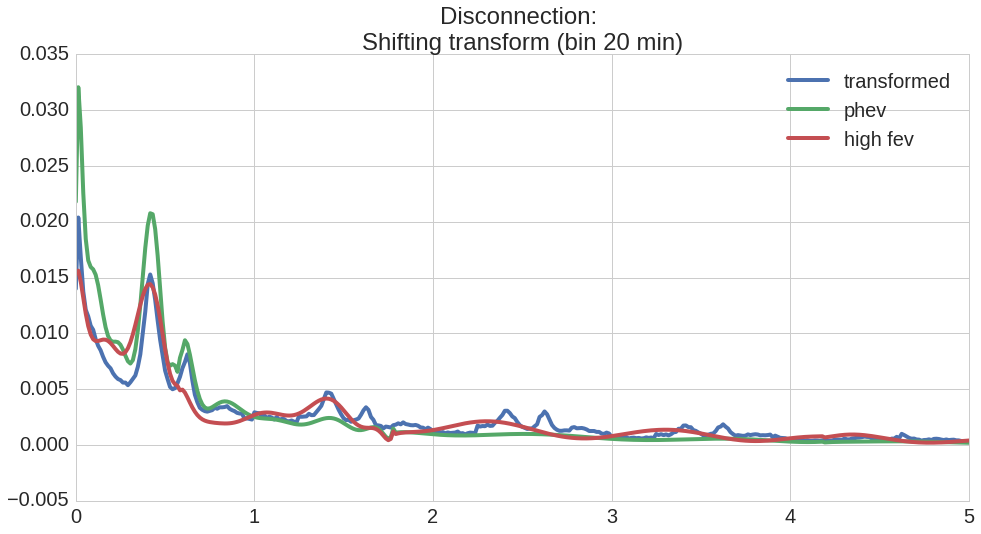

In [167]:
xvals = [i * bin_size / 60 / 24 for i in range(max_dc)]
yvals = [transformed_phev_to_high_summed, disconnection_distribution_phev[:max_dc], 
                                        disconnection_distribution_high_fev[:max_dc]]
ylabs = ['transformed', 'phev', 'high fev']
battery_size_functions.simple_plot_mult_dist(xvals, yvals, ylabs, title = 'Disconnection: \nShifting transform (bin 20 min)',
                                        xmax = 5)


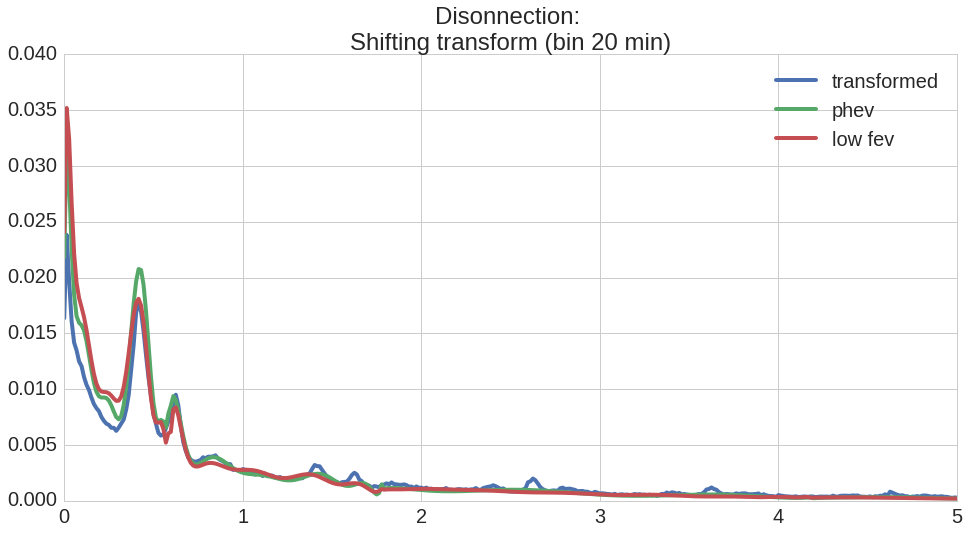

In [169]:
xvals = [i * bin_size / 60 / 24 for i in range(max_dc)]
yvals = [transformed_phev_to_low_summed, disconnection_distribution_phev[:max_dc], 
                                        disconnection_distribution_low_fev[:max_dc]]
ylabs = ['transformed', 'phev', 'low fev']
battery_size_functions.simple_plot_mult_dist(xvals, yvals, ylabs, title = 'Disonnection: \nShifting transform (bin 20 min)',
                                        xmax = 5)



In [178]:
bin_size = 120
max_dc = int(40 * 60 * 24 / bin_size)
max_con = int(5 * 60 * 24 / bin_size)
file_detail = '_bin' + str(bin_size)
directory = 'data/simulation_pkls/'
with open(directory + 'disconnection_distribution_phev' + file_detail + '.pkl', 'rb') as f:
    disconnection_distribution_phev_120 = pickle.load(f)
with open(directory + 'disconnection_distribution_high_fev' + file_detail + '.pkl', 'rb') as f:
    disconnection_distribution_high_fev_120 = pickle.load(f)
with open(directory + 'disconnection_distribution_low_fev' + file_detail + '.pkl', 'rb') as f:
    disconnection_distribution_low_fev_120 = pickle.load(f)

In [179]:
data_dir = 'data/battery_size/'
with open(data_dir + 'transformed_skipping_phev_to_high_bin120.pkl', 'rb') as f:
    transformed_skipping_phev_to_high_bin120 = pickle.load(f)
with open(data_dir + 'transformed_skipping_phev_to_low_bin120.pkl', 'rb') as f:
    transformed_skipping_phev_to_low_bin120 = pickle.load(f)

In [180]:
transformed_phev_to_high_summed_120 = battery_size_functions.sum_lists(transformed_skipping_phev_to_high_bin120)
transformed_phev_to_high_summed_120 = battery_size_functions.convert_to_normed_list(transformed_phev_to_high_summed_120, max_dc)

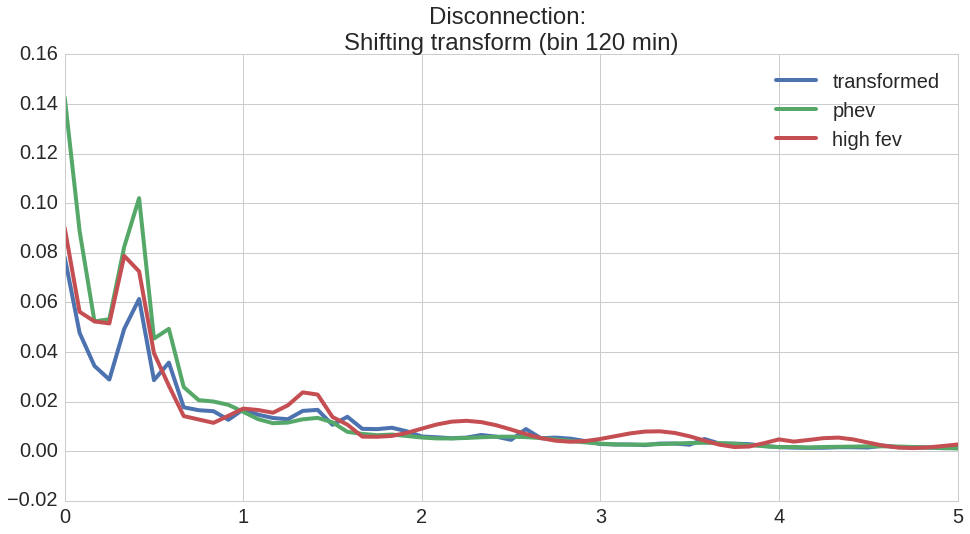

In [182]:
xvals = [i * bin_size / 60 / 24 for i in range(max_dc)]
yvals = [transformed_phev_to_high_summed_120, disconnection_distribution_phev_120[:max_dc], 
                                        disconnection_distribution_high_fev_120[:max_dc]]
ylabs = ['transformed', 'phev', 'high fev']
battery_size_functions.simple_plot_mult_dist(xvals, yvals, ylabs, title = 'Disconnection: \nShifting transform (bin 120 min)',
                                        xmax = 5)

